# Eye glasses detection

In this project, we will create a binary eye-glasses detector.
    We are going to use [CelebA dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) as our dataset. This dataset has face attributes, one of these attributes is eyeglasses.

## Intruduction

### Guidelines

Outline:

1. Install face detector [DSFDDetector](https://github.com/hukkelas/DSFD-Pytorch-Inference)
2. Crop faces using face detector
3. Separate faces with glasses and those without glasses using the attributes
4. build a train-dataloader and a test-dataloader (with 2 classes: `eyeglasses` `no-eyeglasses`)
5. build and train the model  
   Make sure to take into account data imbalance (use any method other than undersampling)
6. evaluate the model

You are allowed to and encouraged to browse the web for help.

[PyTorch](https://pytorch.org/) is the preferred framework.

### Evaluation

You can solve this in any way, however you will be evaluated on the method you used.

Evaluation will be based on:

- code is functional (it works)
- time
- code is organized
- bonus tasks


### Tips

- Feel free to use a subset of the data in-case it's too large or takes too much time
- After making the code for cropping, you can just use the provided cropped images (because cropping takes a very long time, we cropped them for you)

- Use the internet!
- Take your time reading, in fact go over the entire notebook first before writing anything
- Ask for help if you get stuck
- If one thing doesn't work, try something else (even if it's sub-optimal)
- Check your output often, check the data shape makes sense and plot images to prevent confusion or errors
- Keep track of time
- Don't forget to enjoy and benefit from the excercise :)

### Setup

This is a [jupyter notebook](https://jupyter.org/),
here are some [keyboard shortcuts](http://maxmelnick.com/2016/04/19/python-beginner-tips-and-tricks.html) to get you started.

You can run terminal commands using `!` such as:

```shell script
!echo "this is a command"
```


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extracting celeba folder
!unzip "/content/drive/MyDrive/Freelancing_task/Eye_glasses_Detection/Task1_eyeglass_detection/img_align_celeba.zip" -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/img_align_celeba/121162.jpg  
  inflating: /content/img_align_celeba/122168.jpg  
  inflating: /content/img_align_celeba/122210.jpg  
  inflating: /content/img_align_celeba/122314.jpg  
  inflating: /content/img_align_celeba/122429.jpg  
  inflating: /content/img_align_celeba/122644.jpg  
  inflating: /content/img_align_celeba/122833.jpg  
  inflating: /content/img_align_celeba/122858.jpg  
  inflating: /content/img_align_celeba/122870.jpg  
  inflating: /content/img_align_celeba/122892.jpg  
  inflating: /content/img_align_celeba/123151.jpg  
  inflating: /content/img_align_celeba/123725.jpg  
  inflating: /content/img_align_celeba/123827.jpg  
  inflating: /content/img_align_celeba/123970.jpg  
  inflating: /content/img_align_celeba/124382.jpg  
  inflating: /content/img_align_celeba/124477.jpg  
  inflating: /content/img_align_celeba/125266.jpg  
  inflating: /content/img_align_celeba/125419.jpg  
  inflating: 

In [ ]:
# Counting the number of files in that folder
!ls /content/img_align_celeba | wc -l

202599


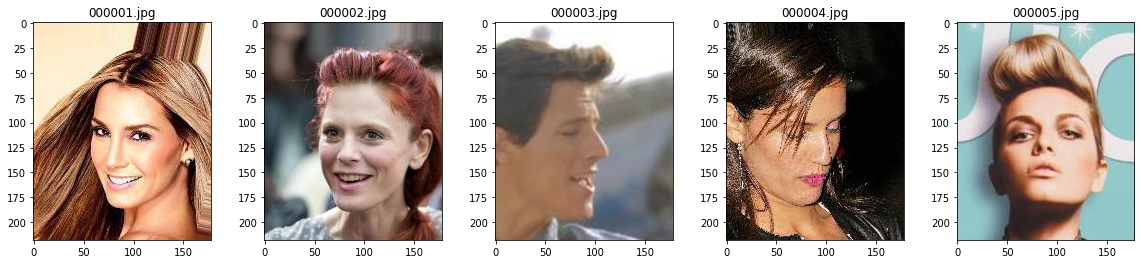

In [ ]:
import matplotlib.pyplot as plt
import os

input_folder = "/content/img_align_celeba"

# Get a list of all the files in the folder
files = os.listdir(input_folder)

# Sort the files alphabetically
files.sort()

# Create a figure with 5 subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Loop through the first 5 files and display them
for i in range(5):
    # Get the file path
    file_path = os.path.join(input_folder, files[i])
    # Load the image using matplotlib
    image = plt.imread(file_path)
    # Show the image on the subplot
    axes[i].imshow(image)
    # Set the subplot title to the file name
    axes[i].set_title(files[i])

# Show the plot
plt.show()


In [ ]:
# Extracting celeba_cropped folder
!unzip "/content/drive/MyDrive/Freelancing_task/Eye_glasses_Detection/Task1_eyeglass_detection/img_align_celeba_cropped.zip" -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/img_align_celeba_cropped/095627.jpg  
  inflating: /content/img_align_celeba_cropped/059683.jpg  
  inflating: /content/img_align_celeba_cropped/120364.jpg  
  inflating: /content/img_align_celeba_cropped/076234.jpg  
  inflating: /content/img_align_celeba_cropped/109294.jpg  
  inflating: /content/img_align_celeba_cropped/012038.jpg  
  inflating: /content/img_align_celeba_cropped/117210.jpg  
  inflating: /content/img_align_celeba_cropped/008658.jpg  
  inflating: /content/img_align_celeba_cropped/110487.jpg  
  inflating: /content/img_align_celeba_cropped/064182.jpg  
  inflating: /content/img_align_celeba_cropped/112694.jpg  
  inflating: /content/img_align_celeba_cropped/090366.jpg  
  inflating: /content/img_align_celeba_cropped/033472.jpg  
  inflating: /content/img_align_celeba_cropped/064013.jpg  
  inflating: /content/img_align_celeba_cropped/191489.jpg  
  inflating: /content/img_align_celeba_cropped/12

In [ ]:
# Counting the number of files in that folder
!ls /content/img_align_celeba_cropped | wc -l


202367


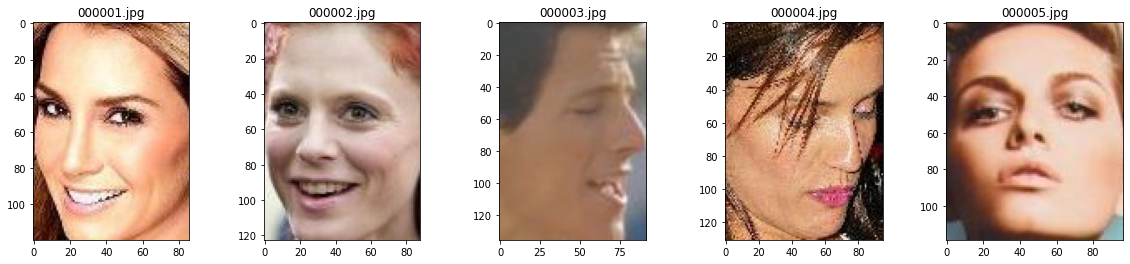

In [ ]:
import matplotlib.pyplot as plt
import os

input_folder = "/content/img_align_celeba_cropped"

# Get a list of all the files in the folder
files = os.listdir(input_folder)

# Sort the files alphabetically
files.sort()

# Create a figure with 5 subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

# Loop through the first 5 files and display them
for i in range(5):
    # Get the file path
    file_path = os.path.join(input_folder, files[i])
    # Load the image using matplotlib
    image = plt.imread(file_path)
    # Show the image on the subplot
    axes[i].imshow(image)
    # Set the subplot title to the file name
    axes[i].set_title(files[i])

# Show the plot
plt.show()


## Install [DSFD Face detector](https://github.com/hukkelas/DSFD-Pytorch-Inference)

In [95]:
!pip install git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/hukkelas/DSFD-Pytorch-Inference.git to /tmp/pip-req-build-ctz_zbtp
  Running command git clone --filter=blob:none --quiet https://github.com/hukkelas/DSFD-Pytorch-Inference.git /tmp/pip-req-build-ctz_zbtp
  Resolved https://github.com/hukkelas/DSFD-Pytorch-Inference.git to commit fc1051d80936e3d7a6e34053bb5485c0a032e42e
  Preparing metadata (setup.py) ... done
  Created wheel for face-detection: filename=face_detection-0.2.1-py3-none-any.whl size=29707 sha256=20bed577b3e01993afe67801aa2755fc77e26eb02ddc89491fa6e2d520278e54
  Stored in directory: /tmp/pip-ephem-wheel-cache-09sjlf63/wheels/57/d0/53/55657e0e64121cb64c10829c2f29bb3703afd0dcee55416e51
Successfully built face-detection


## Crop faces

Run the DSFD face detector to crop the faces (to make the problem easier to solve for our classifier)

This part might take a while to run.

After making the code for cropping a few faces and verified that the code is running, you can just use the provided cropped images `img_align_celeba_cropped.zip`.

### Expected output

A folder with cropped faces

In [96]:
import face_detection
print(face_detection.available_detectors)

['DSFDDetector', 'RetinaNetResNet50', 'RetinaNetMobileNetV1']


In [100]:
detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3)


In [111]:
# Making a list of all images name into /content/img_align_celeba_cropped folder
import os

# specify the directory path
directory = '/content/img_align_celeba'

# use list comprehension to get a list of all files in the directory
file_list = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

In [107]:
!mkdir /content/cropped_image

In [ ]:
import cv2
import face_detection

# Load the image using OpenCV
for i in file_list:
  dir = "/content/img_align_celeba/" + i
  im = cv2.imread(dir)[:, :, ::-1]

  faces = detector.detect(im)

  print(faces)
  # Select the first face detected
  if len(faces) > 0:
      face = faces[0]
  else:
      # If no faces are detected, do something else or exit
      print('No faces detected')
      exit()

  # Crop the image using the coordinates of the selected face
  x1, y1, x2, y2, score = face
  face_img = im[int(y1):int(y2), int(x1):int(x2)]

  # Save the image to a directory
  output = "/content/cropped_image/" + i
  cv2.imwrite(output, face_img)

# Separate faces with glasses and those without glasses using the attributes

In [ ]:
# Load the dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Freelancing_task/Eye_glasses_Detection/Task1_eyeglass_detection/list_attr_celeba.txt", sep='\s+', index_col=False)

df

,Name,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
df.columns

Index(['Name', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [ ]:
# we only need the eyeglasses column for making two folder
df2 = df[['Name', 'Eyeglasses']].copy()

df2

,Name,Eyeglasses
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1
...,...,...
202594,202595.jpg,-1
202595,202596.jpg,-1
202596,202597.jpg,1
202597,202598.jpg,-1


In [ ]:
df2.columns

Index(['Name', 'Eyeglasses'], dtype='object')

In [ ]:
# Checking the value
df2.Eyeglasses.unique()

array([-1,  1])

Seems we've 2 classes: eyeglasses and no-eyeglasses. as our dataset is huge, it takes a long time to move pictures one by one. We will remove all non_eyeglass row from the dataframe so that we can only move the eyeglass picture without applying any condition. 

In [ ]:
!mkdir dataset
!mkdir /content/dataset/eyeglasses
!mkdir /content/dataset/no_eyeglasses

As the cropped dataset is huge and it takes a lot time, we'll drop some data from the folder. we'll keep 10k data only.

In [ ]:
# we'll keep 10k data only.
!find /content/img_align_celeba_cropped -type f -print0 | sort -zR | tail -zn +10001 | xargs -0 rm


In [ ]:
# Making a list of all images name into /content/img_align_celeba_cropped folder
import os

# specify the directory path
directory = '/content/img_align_celeba_cropped'

# use list comprehension to get a list of all files in the directory
file_list = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

# print the list of filenames
print(len(file_list))
print(file_list)


10000
['097309.jpg', '200166.jpg', '089812.jpg', '009303.jpg', '179833.jpg', '135305.jpg', '075826.jpg', '146775.jpg', '004695.jpg', '131888.jpg', '135809.jpg', '144934.jpg', '058031.jpg', '049315.jpg', '170155.jpg', '158274.jpg', '099466.jpg', '154993.jpg', '063471.jpg', '155496.jpg', '004385.jpg', '013635.jpg', '056833.jpg', '139378.jpg', '055066.jpg', '089544.jpg', '160764.jpg', '155356.jpg', '133599.jpg', '122981.jpg', '102479.jpg', '189913.jpg', '057776.jpg', '130101.jpg', '201239.jpg', '154164.jpg', '101158.jpg', '023250.jpg', '147523.jpg', '033324.jpg', '151075.jpg', '043217.jpg', '100498.jpg', '191286.jpg', '002407.jpg', '036288.jpg', '100482.jpg', '192087.jpg', '020153.jpg', '093821.jpg', '094011.jpg', '014716.jpg', '012080.jpg', '100368.jpg', '128387.jpg', '125770.jpg', '185362.jpg', '158977.jpg', '075085.jpg', '024136.jpg', '072120.jpg', '178182.jpg', '121243.jpg', '080760.jpg', '018062.jpg', '012771.jpg', '096232.jpg', '136474.jpg', '132374.jpg', '034664.jpg', '138180.jpg',

In [ ]:
# Here is the script to move all Eyeglasses image to the eyeglasses folder
moving_dir_for_eyeglass = "/content/dataset/eyeglasses/"

for i in file_list:
    current_path = "/content/img_align_celeba_cropped/"+i
    value = df2[df2['Name']==i]['Eyeglasses'].item()
    if value == 1:
        !mv {current_path} {moving_dir_for_eyeglass}

In [ ]:
# Now all the non_eyeglasses pictures will move to the dataset/non_eyeglasses folder
!mv  -v /content/img_align_celeba_cropped/* /content/dataset/no_eyeglasses/
 

Streaming output truncated to the last 5000 lines.
renamed '/content/img_align_celeba_cropped/093705.jpg' -> '/content/dataset/no_eyeglasses/093705.jpg'
renamed '/content/img_align_celeba_cropped/093736.jpg' -> '/content/dataset/no_eyeglasses/093736.jpg'
renamed '/content/img_align_celeba_cropped/093760.jpg' -> '/content/dataset/no_eyeglasses/093760.jpg'
renamed '/content/img_align_celeba_cropped/093772.jpg' -> '/content/dataset/no_eyeglasses/093772.jpg'
renamed '/content/img_align_celeba_cropped/093798.jpg' -> '/content/dataset/no_eyeglasses/093798.jpg'
renamed '/content/img_align_celeba_cropped/093808.jpg' -> '/content/dataset/no_eyeglasses/093808.jpg'
renamed '/content/img_align_celeba_cropped/093821.jpg' -> '/content/dataset/no_eyeglasses/093821.jpg'
renamed '/content/img_align_celeba_cropped/093825.jpg' -> '/content/dataset/no_eyeglasses/093825.jpg'
renamed '/content/img_align_celeba_cropped/093853.jpg' -> '/content/dataset/no_eyeglasses/093853.jpg'
renamed '/content/img_align_cel

In [ ]:
# For making available offline
!zip -r "dataset.zip" "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  adding: content/dataset/no_eyeglasses/024584.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses/144437.jpg (deflated 4%)
  adding: content/dataset/no_eyeglasses/141305.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses/069731.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses/039151.jpg (deflated 4%)
  adding: content/dataset/no_eyeglasses/148734.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses/054064.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses/027394.jpg (deflated 4%)
  adding: content/dataset/no_eyeglasses/190410.jpg (deflated 5%)
  adding: content/dataset/no_eyeglasses/090312.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses/036897.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses/060197.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses/072417.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses/029430.jpg (deflated 3%)
  adding: content/dataset/no_eyeglasses

In [ ]:
#creating Train and Test folder
!mkdir /content/dataset/Train


In [ ]:
!mkdir /content/dataset/Test
!mkdir /content/dataset/Test/no_eyeglasses
!mkdir /content/dataset/Test/eyeglasses

In [ ]:
!mv /content/dataset/eyeglasses /content/dataset/Train
!mv /content/dataset/no_eyeglasses /content/dataset/Train

In [ ]:
%cd /content/dataset/Train/eyeglasses
!mv `ls | head -50` /content/dataset/Test/eyeglasses

%cd /content/dataset/Train/no_eyeglasses
!mv `ls | head -800` /content/dataset/Test/no_eyeglasses

/content/dataset/Train/eyeglasses
/content/dataset/Train/no_eyeglasses


# Dealing with class imballance

In [ ]:
!ls /content/dataset/Train/eyeglasses | wc -l
!ls /content/dataset/Test/eyeglasses | wc -l

638
50


In [ ]:
!ls /content/dataset/Train/no_eyeglasses | wc -l
!ls /content/dataset/Test/no_eyeglasses | wc -l


8512
800


**As we see that eyeglasses data is very less, we'll use data augmentation technique to increase the data.**

## Build dataloaders

### Expected output:

Train loader and test loader, each with 2 classes: `eyeglasses` and `no-eyeglasses`

In [ ]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'Train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'Test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = '/content/dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['Train', 'Test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['Train', 'Test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['Train', 'Test']}
class_names = image_datasets['Train'].classes

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [93]:
dataloaders

{'Train': <torch.utils.data.dataloader.DataLoader at 0x7fe3a08e0250>,
 'Test': <torch.utils.data.dataloader.DataLoader at 0x7fe3a08e04c0>}

## build a classifier using transfer learning

### Expected output

a pytorch classifier model to classify `eyeglasses` vs `no-eyeglasses`

In [ ]:
model_ft = models.resnet18(pretrained=True)


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

## Train

NOTE: Be sure to take into account imbalanced data. Use any method other than undersampling

### Expected output:

a trained model

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['Train', 'Test']:
            if phase == 'Train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'Train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'Train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'Train':
                scheduler.step()
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
# deep copy the model
            if phase == 'Test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')
# load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [54]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Train Loss: 0.0471 Acc: 0.9864
Test Loss: 0.0298 Acc: 0.9953

Epoch 1/9
----------
Train Loss: 0.0441 Acc: 0.9868
Test Loss: 0.0275 Acc: 0.9953

Epoch 2/9
----------
Train Loss: 0.0499 Acc: 0.9862
Test Loss: 0.0327 Acc: 0.9953

Epoch 3/9
----------
Train Loss: 0.0474 Acc: 0.9863
Test Loss: 0.0287 Acc: 0.9965

Epoch 4/9
----------
Train Loss: 0.0500 Acc: 0.9861
Test Loss: 0.0332 Acc: 0.9941

Epoch 5/9
----------
Train Loss: 0.0443 Acc: 0.9884
Test Loss: 0.0269 Acc: 0.9941

Epoch 6/9
----------
Train Loss: 0.0445 Acc: 0.9869
Test Loss: 0.0278 Acc: 0.9929

Epoch 7/9
----------
Train Loss: 0.0531 Acc: 0.9838
Test Loss: 0.0318 Acc: 0.9953

Epoch 8/9
----------
Train Loss: 0.0396 Acc: 0.9885
Test Loss: 0.0293 Acc: 0.9953

Epoch 9/9
----------
Train Loss: 0.0445 Acc: 0.9875
Test Loss: 0.0315 Acc: 0.9929

Training complete in 11m 22s
Best val Acc: 0.996471


In [58]:
%cd /content
torch.save(model.state_dict(), 'model_weights.pth')


/content


## Bonus 1: Visualization (tensorboard is recommended)

Visualize losses, and anything else that may be helpful

## Bonus 2: Hyperparameter search (gridsearch)



In [71]:
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [75]:
# code here ...
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/eyeGlasses_experiment_1')

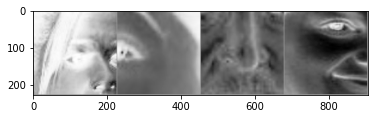

In [76]:
# get some random training images
dataiter = iter(dataloaders.get('Train'))
images, labels = next(dataiter)

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('EyeGlasses', img_grid)

In [78]:
!tensorboard --logdir=runs


2023-02-27 16:08:15.289578: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-27 16:08:15.289700: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-27 16:08:15.289720: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflo

## Evaluation

Properly evaluate the trained model and interpret results

In [55]:
# code here ...
model.eval()

Binary_Classifier(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=720, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



Predicted:  [tensor(1, device='cuda:0')] [tensor(1, device='cuda:0')] [tensor(1, device='cuda:0')] [tensor(1, device='cuda:0')]


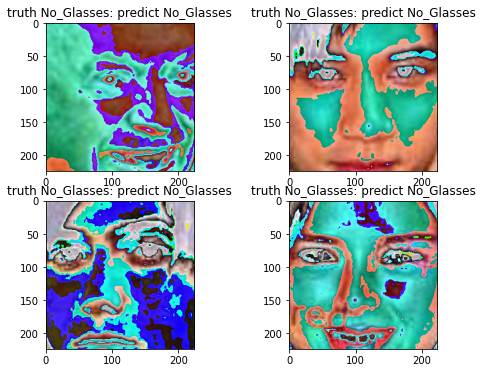

In [92]:
#make an iterator from test_loader
#Get a batch of training images
classes = ('Glasses', 'No_Glasses')
rows = 2
columns = 2
test_iterator = iter(dataloaders.get('Test'))
images, labels = next(test_iterator)

images, labels = images.to(device), labels.to(device)

results = model_ft(images)
_, predicted = torch.max(results, 1)

print('Predicted: ', ' '.join('%5s' % [predicted[j]] for j in range(4)))

fig2 = plt.figure(figsize=(8, 6))
for i in range(4):
   fig2.add_subplot(rows, columns, i+1)
   plt.title('truth ' + classes[labels[i]] + ': predict ' + classes[predicted[i]])
   img = images[i] / 2 + 0.5     # this is to unnormalize the image
   img = torchvision.transforms.ToPILImage()(img)
   plt.imshow(img)
plt.show()

## reflection

Explain your results and mention any improvements you could've made

This is an open-ended question

To improve accuracy I can - 


1.   Increase the size of the dataset: A larger dataset can help the model learn more about the features and patterns in the  data, which can improve its accuracy. As I've train only 10k image for hardware limitation and time limitation, It's gonna be much more accurate if I can train the whole dataset. 
2.   Balance the dataset: The dataset is highly Imbalance as we can see. The two class has (9:1) ratio. I can do some manual data augmentaion, oversampling/undersampling(though it's forbidden in this assignment), giving class_weight, Synthetic data generation. the easiest and fastest way is giving class_weight. class_weight may increase the accuracy.
3.  Preprocess the data: I've tried to preprocess data as much as I can. If I got extra time, I might invest some more time in preprocessing the dataset. 
4. Hyper parameter tuning: I did hyper parameter tuning as possible as I can in that limited time. If I tweek batch size, epoch, learning rate etc, it will be much more accurate.
